In [77]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [78]:
!pip install ruptures

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.offline as py

In [80]:
import warnings
warnings.filterwarnings('ignore')

In [81]:
%matplotlib inline
import matplotlib.pyplot as plt

In [82]:
# For interactive widgets in Colab
from ipywidgets import interact, widgets

# Descriptive Analysis

In [83]:
EU_data = pd.read_csv("/content/drive/MyDrive/Dataset/carbonmonitor-eu.csv")
EU_data.head()

country        date sector  MtCO2 per day
0  Norway  01-01-2019  Power       0.006542
1  Norway  02-01-2019  Power       0.005956
2  Norway  03-01-2019  Power       0.006048
3  Norway  04-01-2019  Power       0.005940
4  Norway  05-01-2019  Power       0.005649

In [84]:
print("DataFrame shape:", EU_data.shape)

DataFrame shape: (407712, 4)


In [85]:
EU_data['country'].unique()

array(['Norway', 'Switzerland', 'Austria', 'Belgium', 'Bulgaria',
       'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia',
       'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Ireland',
       'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta',
       'Netherlands', 'Poland', 'Portugal', 'Romania', 'Slovakia',
       'Slovenia', 'Spain', 'Sweden', 'United Kingdom', 'EU27 & UK'],
      dtype=object)

In [86]:
print("Missing values per column:")
print(EU_data.isnull().sum())

Missing values per column:
country          0
date             0
sector           0
MtCO2 per day    0
dtype: int64


In [87]:
print("Number of duplicate rows:")
print(EU_data.duplicated().sum())

Number of duplicate rows:
0


In [88]:
# Pivot table: Daily total emissions for each country (aggregated over sectors)
EU_country = EU_data.pivot_table(index='date', columns='country', values='MtCO2 per day', aggfunc='sum')
print("\nDescriptive stats for country-wise totals:")
print(EU_country.describe())


Descriptive stats for country-wise totals:
country      Austria      Belgium     Bulgaria      Croatia       Cyprus  \
count    2192.000000  2192.000000  2192.000000  2192.000000  2192.000000   
mean        0.195147     0.264029     0.103359     0.048397     0.021427   
std         0.077332     0.047854     0.021337     0.006639     0.003017   
min         0.076613     0.175689     0.059847     0.025428     0.011942   
25%         0.152832     0.231217     0.086111     0.044382     0.019529   
50%         0.192348     0.255004     0.103294     0.048563     0.021362   
75%         0.226960     0.290519     0.117611     0.053275     0.023227   
max         1.475956     0.439448     0.154374     0.071872     0.030061   

country  Czech Republic      Denmark    EU27 & UK      Estonia      Finland  \
count       2192.000000  2192.000000  2192.000000  2192.000000  2192.000000   
mean           0.264160     0.091483     8.632279     0.033463     0.102122   
std            0.052146     0.0152

In [89]:
exclude = ["EU27 & UK", "WORLD", "ROW"]
EU_filtered = EU_data[~EU_data['country'].isin(exclude)].copy()
eu_emissions = (
    EU_filtered
    .groupby('date')['MtCO2 per day']
    .sum()
    .reset_index(name='total_emissions')
)
print("European Emissions Summary (Excl. Aggregates):")
print(eu_emissions['total_emissions'].describe())

European Emissions Summary (Excl. Aggregates):
count    2192.000000
mean        8.645387
std         1.369326
min         5.876266
25%         7.595112
50%         8.396487
75%         9.676327
max        12.452472
Name: total_emissions, dtype: float64


In [90]:
EU_data['date'] = pd.to_datetime(EU_data['date'], dayfirst=True, errors='coerce')

# Univariate Analysis

Descriptive stats for sector-wise totals (excluding aggregates):
sector  Domestic Aviation  Ground Transport     Industry  \
count         2192.000000       2192.000000  2192.000000   
mean             0.048944          2.491573     1.804050   
std              0.012595          0.183724     0.274326   
min              0.006112          1.506140     0.876405   
25%              0.047899          2.449992     1.653805   
50%              0.053303          2.524767     1.826992   
75%              0.056912          2.608040     1.975872   
max              0.064668          2.734808     3.151290   

sector  International Aviation        Power  Residential  
count              2192.000000  2192.000000  2192.000000  
mean                  0.346429     2.250659     1.703733  
std                   0.127055     0.549585     0.844235  
min                   0.059637     1.084324     0.578990  
25%                   0.274979     1.851745     0.827610  
50%                   0.377540     2.254

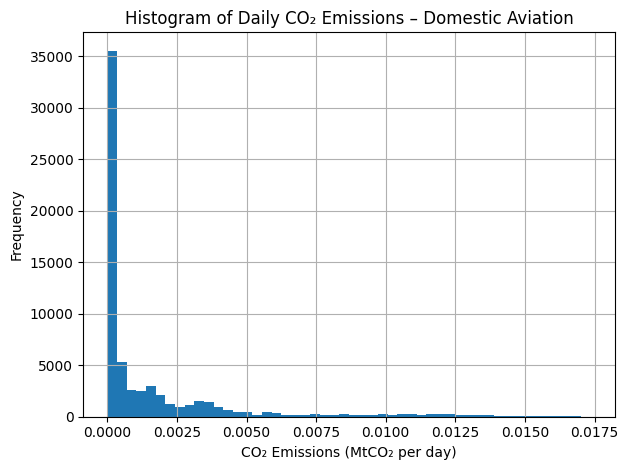

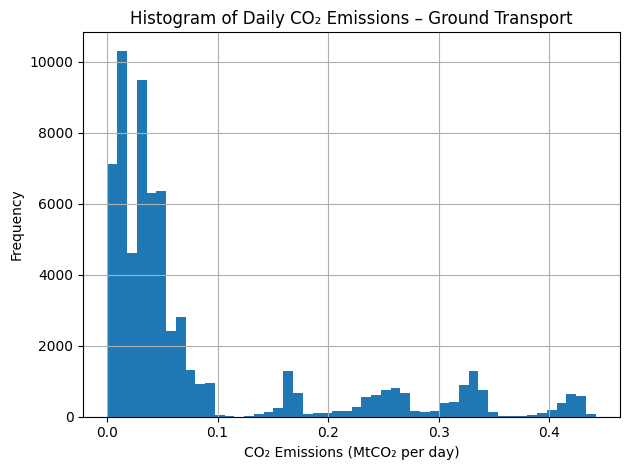

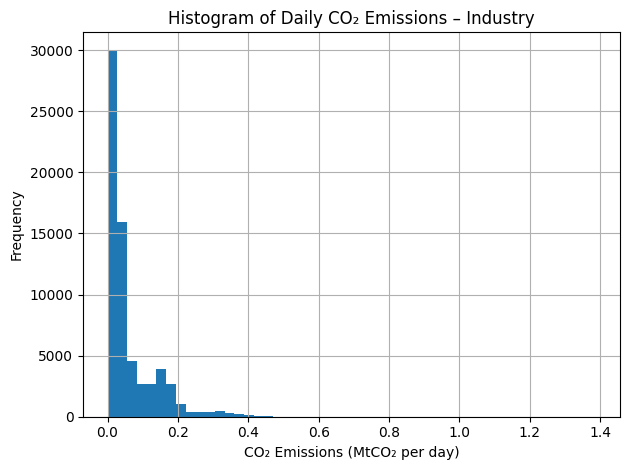

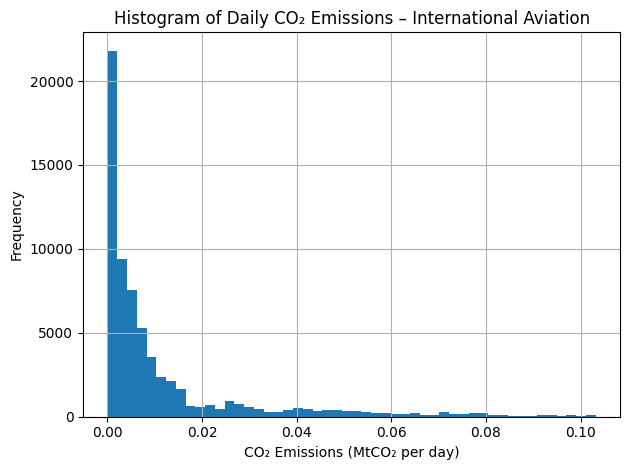

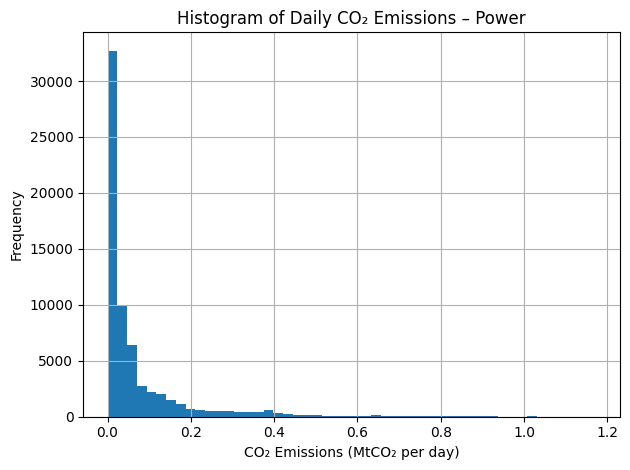

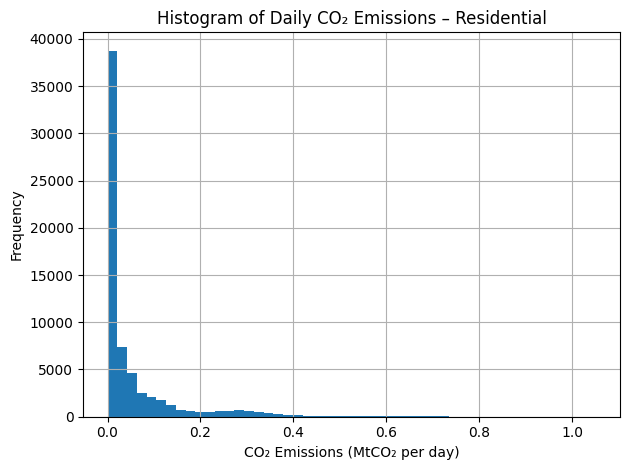

In [91]:
# 1) Exclude aggregate regions
exclude = ["EU27 & UK", "WORLD", "ROW"]
EU_filtered = EU_data[~EU_data['country'].isin(exclude)].copy()

# 2) Pivot table: Daily total emissions for each sector (aggregated over non-aggregate countries)
EU_sector = EU_filtered.pivot_table(
    index='date',
    columns='sector',
    values='MtCO2 per day',
    aggfunc='sum'
)

print("Descriptive stats for sector-wise totals (excluding aggregates):")
print(EU_sector.describe(), "\n")

# 3) Descriptive statistics by sector (non-aggregates)
stats = EU_filtered.groupby('sector')['MtCO2 per day'].describe().reset_index()
print("=== Descriptive Statistics by Sector (Excl. Aggregates) ===")
print(stats, "\n")

# 4) Histograms per sector (non-aggregates)
for sector, sub in EU_filtered.groupby('sector'):
    plt.figure()
    sub['MtCO2 per day'].hist(bins=50)
    plt.title(f'Histogram of Daily CO₂ Emissions – {sector}')
    plt.xlabel('CO₂ Emissions (MtCO₂ per day)')
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()


<Figure size 1000x600 with 0 Axes>

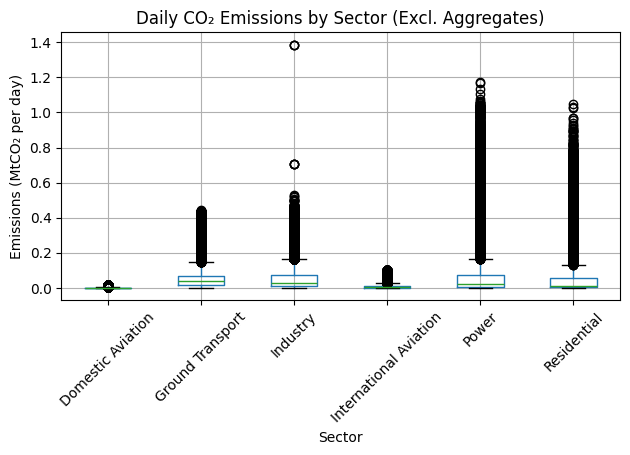

In [92]:
# 1) Exclude aggregate regions
exclude = ["EU27 & UK", "WORLD", "ROW"]
EU_filtered = EU_data[~EU_data['country'].isin(exclude)].copy()

# 2) Boxplot across all sectors (excluding aggregates)
plt.figure(figsize=(10,6))
EU_filtered.boxplot(column='MtCO2 per day', by='sector', rot=45)
plt.title('Daily CO₂ Emissions by Sector (Excl. Aggregates)')
plt.suptitle('')
plt.xlabel('Sector')
plt.ylabel('Emissions (MtCO₂ per day)')
plt.tight_layout()
plt.show()



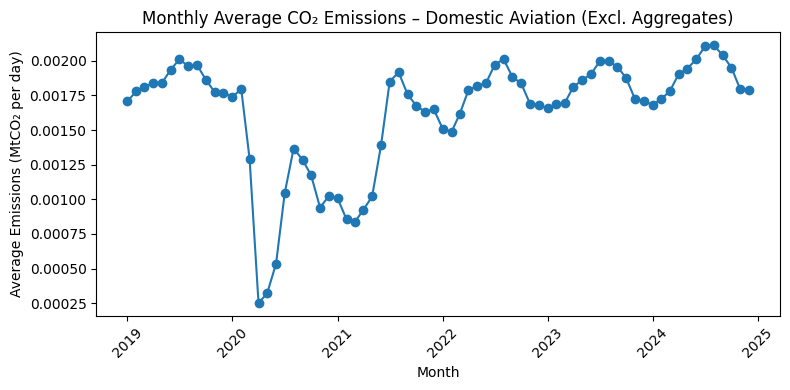

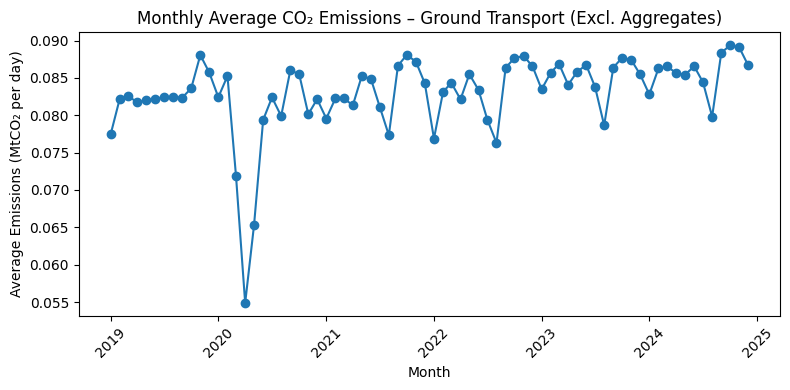

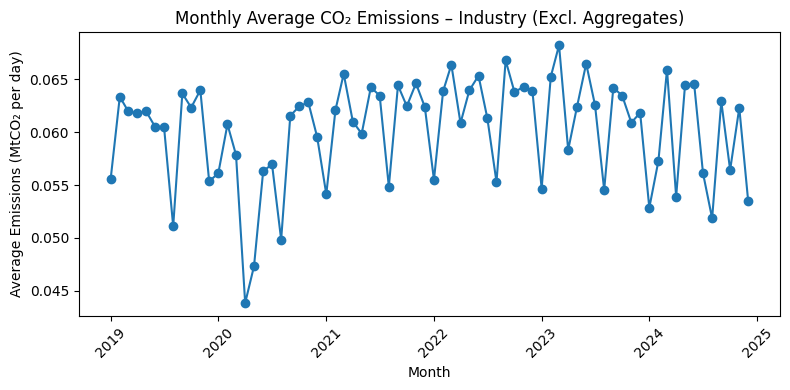

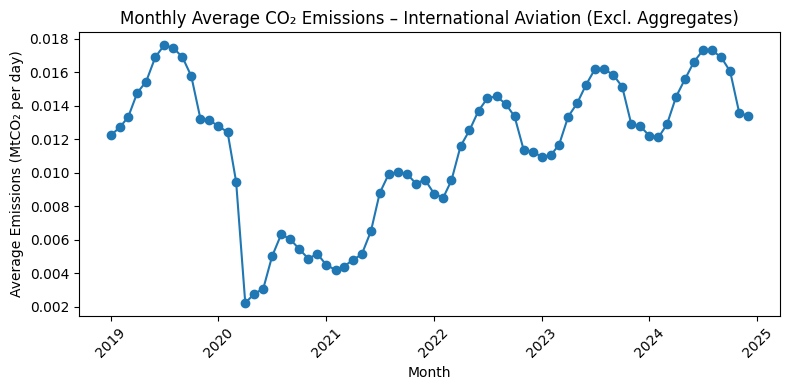

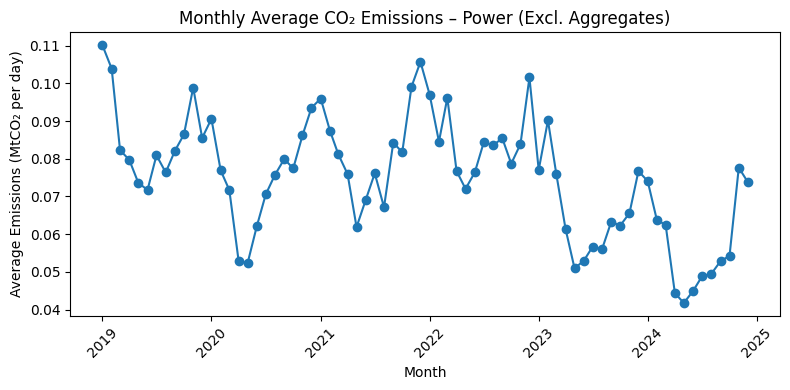

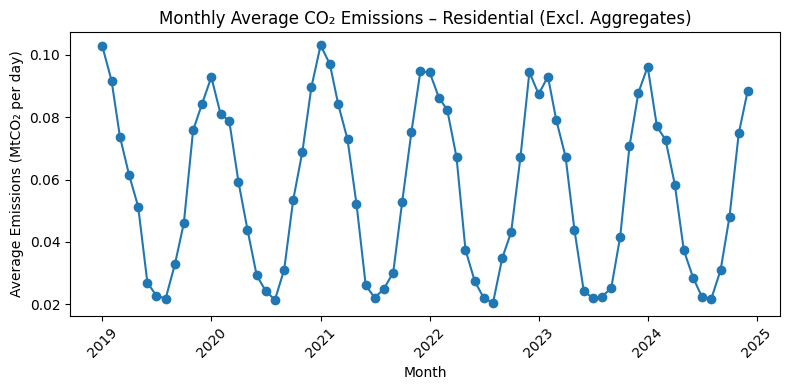

In [93]:
# 3) Monthly average time series per sector (excluding aggregates)
EU_filtered['month'] = EU_filtered['date'].dt.to_period('M').dt.to_timestamp()
monthly = (
    EU_filtered
    .groupby(['month', 'sector'])['MtCO2 per day']
    .mean()
    .reset_index()
)

for sector, sub in monthly.groupby('sector'):
    plt.figure(figsize=(8,4))
    plt.plot(sub['month'], sub['MtCO2 per day'], marker='o')
    plt.title(f'Monthly Average CO₂ Emissions – {sector} (Excl. Aggregates)')
    plt.xlabel('Month')
    plt.ylabel('Average Emissions (MtCO₂ per day)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


# Top Emitters

In [94]:
eu_agg_regions = ["EU27 & UK"]
eu_individual = EU_data[~EU_data['country'].isin(eu_agg_regions)]

country_emissions = eu_individual.groupby('country')['MtCO2 per day'].sum().reset_index()

top10 = country_emissions.sort_values(by='MtCO2 per day', ascending=False).head(10)
bottom10 = country_emissions.sort_values(by='MtCO2 per day', ascending=True).head(10)

print("Top 10 Emitting Countries in Europe:")
print(top10)

print("\nBottom 10 Emitting Countries in Europe:")
print(bottom10)

fig_top = px.bar(
    top10,
    x='country',
    y='MtCO2 per day',
    title="Top 10 Emitting Countries (Total Emissions Over the Period)"
)
fig_top.show()



Top 10 Emitting Countries in Europe:
           country  MtCO2 per day
10         Germany    3862.160080
29  United Kingdom    2106.791343
14           Italy    1867.664093
21          Poland    1827.844420
9           France    1774.877192
26           Spain    1443.745078
19     Netherlands     869.529047
5   Czech Republic     579.038970
1          Belgium     578.750511
0          Austria     427.761142

Bottom 10 Emitting Countries in Europe:
       country  MtCO2 per day
18       Malta       8.303085
4       Cyprus      46.968531
15      Latvia      48.195370
17  Luxembourg      66.915511
7      Estonia      73.350553
25    Slovenia      78.178552
16   Lithuania      80.902333
3      Croatia     106.086441
24    Slovakia     181.534394
6      Denmark     200.531331


In [95]:

# Remove aggregate region
eu_agg_regions = ["EU27 & UK"]
eu_individual = EU_data[~EU_data['country'].isin(eu_agg_regions)]

# Sum of total emissions over the entire period for each country
country_emissions = eu_individual.groupby('country')['MtCO2 per day'].sum().reset_index()
country_emissions.rename(columns={"MtCO2 per day": "Total Emissions (MtCO₂)"}, inplace=True)

# Get top 10 and bottom 10 emitters
top10 = country_emissions.sort_values(by='Total Emissions (MtCO₂)', ascending=False).head(10)
bottom10 = country_emissions.sort_values(by='Total Emissions (MtCO₂)', ascending=True).head(10)

# Combined figure with Tableau-like color theme
fig_combined = px.bar(
    pd.concat([top10, bottom10]),
    x='country',
    y='Total Emissions (MtCO₂)',
    color='Total Emissions (MtCO₂)',
    color_continuous_scale='Tealrose',
    title="Top and Bottom 10 Emitting European Countries (Total Emissions Over Full Time Span)",
    labels={'country': 'Country', 'Total Emissions (MtCO₂)': 'Total Emissions (MtCO₂)'},
)
fig_combined.update_layout(xaxis_tickangle=45)

# Prepare data for choropleth map for year 2020
year_of_interest = 2020
df_year = eu_individual[eu_individual['date'].dt.year == year_of_interest].copy()
df_year_agg = df_year.groupby('country')['MtCO2 per day'].sum().reset_index()

# First Choropleth Map (2020)
choropleth_fig = px.choropleth(
    df_year_agg,
    scope="europe",
    locations='country',
    locationmode='country names',
    color='MtCO2 per day',
    color_continuous_scale='Viridis',
    title=f"European Emissions by Country in {year_of_interest} (MtCO₂/day)",
    labels={'MtCO2 per day': 'Emissions (MtCO₂/day)'}
)

print("Top 10 Emitting European Countries \n", top10)
print("Bottom 10 Emitting European Countries \n", bottom10)

fig_combined.show()
choropleth_fig.show()


Top 10 Emitting European Countries 
            country  Total Emissions (MtCO₂)
10         Germany              3862.160080
29  United Kingdom              2106.791343
14           Italy              1867.664093
21          Poland              1827.844420
9           France              1774.877192
26           Spain              1443.745078
19     Netherlands               869.529047
5   Czech Republic               579.038970
1          Belgium               578.750511
0          Austria               427.761142
Bottom 10 Emitting European Countries 
        country  Total Emissions (MtCO₂)
18       Malta                 8.303085
4       Cyprus                46.968531
15      Latvia                48.195370
17  Luxembourg                66.915511
7      Estonia                73.350553
25    Slovenia                78.178552
16   Lithuania                80.902333
3      Croatia               106.086441
24    Slovakia               181.534394
6      Denmark               200.531331

In [96]:
# Plot top 10 emitters with emission values
fig_top = px.bar(
    top10,
    x='country',
    y='Total Emissions (MtCO₂)',
    color='Total Emissions (MtCO₂)',
    color_continuous_scale='oranges',
    title="Top 10 Emitting European Countries (Total Emissions Over 2019–2024)",
    labels={'country': 'Country', 'Total Emissions (MtCO₂)': 'Total Emissions (MtCO₂)'},
    text='Total Emissions (MtCO₂)'  # This line enables value display
)
fig_top.update_traces(texttemplate='%{text:.2f}', textposition='outside')
fig_top.update_layout(xaxis_tickangle=45)

# Plot bottom 10 emitters with emission values
fig_bottom = px.bar(
    bottom10,
    x='country',
    y='Total Emissions (MtCO₂)',
    color='Total Emissions (MtCO₂)',
    color_continuous_scale='Greens',
    title="Bottom 10 Emitting European Countries (Total Emissions Over 2019–2024)",
    labels={'country': 'Country', 'Total Emissions (MtCO₂)': 'Total Emissions (MtCO₂)'},
    text='Total Emissions (MtCO₂)'
)
fig_bottom.update_traces(texttemplate='%{text:.2f}', textposition='outside')
fig_bottom.update_layout(xaxis_tickangle=45)

fig_top.show()
fig_bottom.show()


In [98]:
EU_data['year'] = EU_data['date'].dt.year
eu_agg = EU_data.groupby(['country', 'year'])['MtCO2 per day'].sum().reset_index()
eu_agg_countries = ["EU27 & UK"]
eu_agg = eu_agg[~eu_agg['country'].isin(eu_agg_countries)]

def top_n_for_each_year(EU_data, n=12):
    return EU_data.sort_values(['year', 'MtCO2 per day'], ascending=[True, False]) \
                  .groupby('year').head(n)

eu_top10 = top_n_for_each_year(eu_agg, 12)

fig = px.bar(
    eu_top10,
    x="MtCO2 per day",
    y="country",
    color="country",
    orientation='h',
    animation_frame="year",
    range_x=[0, eu_top10['MtCO2 per day'].max()*1.1],
    title="Bar Chart Race: Emissions in Europe Over Time",
    text="MtCO2 per day"  # 👈 Add value text to bars
)

fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')  # Formatting the text

fig.show()


In [99]:
eu_agg['rank'] = eu_agg.groupby('year')['MtCO2 per day'].rank(ascending=False, method='first')

fig = px.bar(
    eu_agg[eu_agg['rank'] <= 10],  # Still show top 10 per year
    x='rank',
    y='country',
    animation_frame='year',
    color='country',
    orientation='h',
    title='Bar Chart Race (by Rank): European Emissions Over Time',
    text='rank'
)
fig.update_traces(texttemplate='Rank %{text:.0f}', textposition='outside')
fig.update_layout(xaxis=dict(autorange='reversed'))  # Rank 1 on top
fig.show()


In [100]:
EU_data['year'] = EU_data['date'].dt.year
yearly_emissions = EU_data.groupby(['country','year'])['MtCO2 per day'].sum().reset_index()

fig = px.bar(
    yearly_emissions,
    x="country",
    y="MtCO2 per day",
    color="country",
    animation_frame="year",
    range_y=[0, yearly_emissions['MtCO2 per day'].max() * 1.1],
    title="Animated Bar Plot: Europe Emissions Over the Years"
)
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()


# Pareto Chart

In [101]:
# Compute total emissions and fractions
total_emissions = EU_data.groupby('country')['MtCO2 per day'].sum()
eu27uk_total = total_emissions.loc['EU27 & UK']
fractions = (total_emissions / eu27uk_total).drop('EU27 & UK').sort_values(ascending=False).head(10)
cumulative = fractions.cumsum()

# Create Pareto chart in Plotly
fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(
    go.Bar(x=fractions.index, y=fractions.values, name='Fraction of EU27 & UK Emissions'),
    secondary_y=False
)
fig.add_trace(
    go.Scatter(x=cumulative.index, y=cumulative.values, name='Cumulative Fraction', mode='lines+markers'),
    secondary_y=True
)

# Update layout and axes
fig.update_layout(
    title="Pareto Chart: Top 10 Countries’ Share of EU27 & UK Emissions",
    xaxis_tickangle=-45,
    xaxis_title="Country"
)
fig.update_yaxes(title_text="Fraction of EU27 & UK Emissions", secondary_y=False)
fig.update_yaxes(title_text="Cumulative Fraction", secondary_y=True, range=[0, 1])

fig.show()

In [102]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Compute total emissions and fractions
total_emissions = EU_data.groupby('country')['MtCO2 per day'].sum()
eu27uk_total = total_emissions.loc['EU27 & UK']
fractions = (total_emissions / eu27uk_total).drop('EU27 & UK').sort_values(ascending=False).head(10)
cumulative = fractions.cumsum()

# Create Pareto chart with value labels and custom colors
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Bar chart (e.g., dark teal)
fig.add_trace(
    go.Bar(
        x=fractions.index,
        y=fractions.values,
        name='Fraction of EU27 & UK Emissions',
        text=[f"{v:.2%}" for v in fractions.values],
        textposition='outside',
        marker_color='rgb(254, 130, 140)'  # Dark teal
    ),
    secondary_y=False
)

# Line chart (e.g., coral orange)
fig.add_trace(
    go.Scatter(
        x=cumulative.index,
        y=cumulative.values,
        name='Cumulative Fraction',
        mode='lines+markers+text',
        text=[f"{v:.2%}" for v in cumulative.values],
        textposition='top center',
        line=dict(color='coral', width=3),  # Coral line
        marker=dict(size=8)
    ),
    secondary_y=True
)

# Layout settings
fig.update_layout(
    title="Pareto Chart: Top 10 Countries’ Share of EU27 & UK Emissions",
    xaxis_tickangle=-45,
    xaxis_title="Country"
)
fig.update_yaxes(title_text="Fraction of EU27 & UK Emissions", secondary_y=False)
fig.update_yaxes(title_text="Cumulative Fraction", secondary_y=True, range=[0, 1])

fig.show()


# Bump Chart

In [103]:
EU_data['year'] = EU_data['date'].dt.year
df_agg = EU_data.groupby(['country', 'year'])['MtCO2 per day'].sum().reset_index()
agg_countries = ["WORLD", "EU27 & UK", "ROW"]
df_agg = df_agg[~df_agg['country'].isin(agg_countries)]
df_agg['rank'] = df_agg.groupby('year')['MtCO2 per day'].rank(method='first', ascending=False)
fig = px.line(df_agg, x='year', y='rank', color='country', title="Bump Chart of Country Emission Rankings Over Time", markers=True)
fig.update_yaxes(autorange='reversed')
fig.show()

In [104]:
# Aggregate annual emissions per country
df_agg = EU_data.groupby(['country', 'year'])['MtCO2 per day'].sum().reset_index()

# Exclude aggregate groups
agg_countries = ["WORLD", "EU27 & UK", "ROW"]
df_agg = df_agg[~df_agg['country'].isin(agg_countries)]

# Compute ranks per year
df_agg['rank'] = df_agg.groupby('year')['MtCO2 per day'] \
                       .rank(method='first', ascending=False)

# Pivot for heatmap: countries as rows, years as columns
heat_df = df_agg.pivot(index='country', columns='year', values='rank')

# Sort countries by latest year rank
latest_year = heat_df.columns.max()
heat_df = heat_df.sort_values(by=latest_year)

# Create Plotly heatmap
fig = go.Figure(data=go.Heatmap(
    z=heat_df.values,
    x=[str(year) for year in heat_df.columns],
    y=heat_df.index,
    colorscale='Viridis_r',
    colorbar=dict(title="Emission Rank")
))

fig.update_layout(
    title="Heatmap of Country Emission Rankings",
    xaxis_title="Year",
    yaxis_title="Country",
    yaxis=dict(autorange='reversed')
)

fig.show()

# Slope Chart

In [105]:
start_year = 2019
end_year = 2024

df_slope = EU_data[EU_data['date'].dt.year.isin([start_year, end_year])].copy()
df_slope = df_slope.groupby(['country', EU_data['date'].dt.year])['MtCO2 per day'].sum().reset_index()
df_slope.columns = ['country', 'year', 'emissions']
exclude = ["WORLD", "EU27 & UK", "ROW"]
df_slope = df_slope[~df_slope['country'].isin(exclude)]
df_slope_pivot = df_slope.pivot(index='country', columns='year', values='emissions').fillna(0)
df_slope_pivot.reset_index(inplace=True)
df_slope_pivot.sort_values(by=start_year, ascending=False, inplace=True)

fig = go.Figure()
for i, row in df_slope_pivot.iterrows():
    fig.add_trace(go.Scatter(
        x=[start_year, end_year],
        y=[row[start_year], row[end_year]],
        mode='lines+markers',
        name=row['country'],
        text=[row['country'], f"{row[end_year]:.1f}"],
        textposition=["middle left", "middle right"]
    ))
fig.update_layout(title=f"Slope Chart of EU Emissions: {start_year} vs. {end_year}",
                  xaxis_title="Year",
                  yaxis_title="Emissions (MtCO2)")
fig.show()


In [106]:
slope_data = eu_agg[eu_agg['year'].isin([2019, 2024])]
slope_data = slope_data[slope_data['rank'] <= 10]

fig = px.line(
    slope_data,
    x='year',
    y='rank',
    color='country',
    line_group='country',
    markers=True,
    title='Slope Chart: Rank Change from 2019 to 2024 (Top 10)',
    labels={'rank': 'Rank'}
)

fig.update_yaxes(autorange='reversed')
fig.update_layout(yaxis_title='Rank', xaxis_title='Year')
fig.show()


In [107]:
import plotly.graph_objects as go

start_year = 2019
end_year = 2024

# Filter and aggregate data for the two years
df_slope = (
    EU_data[EU_data['year'].isin([start_year, end_year])]
    .groupby(['country', 'year'])['MtCO2 per day']
    .sum()
    .reset_index()
)

# Exclude aggregate regions
exclude = ["WORLD", "EU27 & UK", "ROW"]
df_slope = df_slope[~df_slope['country'].isin(exclude)]

# Pivot for dumbbell chart
df_slope_pivot = df_slope.pivot(index='country', columns='year', values='MtCO2 per day').fillna(0)
df_slope_pivot.reset_index(inplace=True)
df_slope_pivot.sort_values(by=start_year, ascending=False, inplace=True)

# Create the figure
fig = go.Figure()

# Add lines between start and end years for each country
for _, row in df_slope_pivot.iterrows():
    color = 'red' if row[end_year] > row[start_year] else 'green'
    fig.add_trace(go.Scatter(
        x=[row[start_year], row[end_year]],
        y=[row['country'], row['country']],
        mode='lines',
        line=dict(color=color, width=2),
        showlegend=False
    ))

# Add start year points with values
fig.add_trace(go.Scatter(
    x=df_slope_pivot[start_year],
    y=df_slope_pivot['country'],
    mode='markers+text',
    marker=dict(color='blue', size=8),
    text=[f"{val:.2f}" for val in df_slope_pivot[start_year]],
    textposition="middle right",
    name=str(start_year)
))

# Add end year points with values
fig.add_trace(go.Scatter(
    x=df_slope_pivot[end_year],
    y=df_slope_pivot['country'],
    mode='markers+text',
    marker=dict(color='orange', size=8),
    text=[f"{val:.2f}" for val in df_slope_pivot[end_year]],
    textposition="middle left",
    name=str(end_year)
))

# Final layout
fig.update_layout(
    title=f"Horizontal Dumbbell Chart: CO₂ Emissions {start_year} vs. {end_year}",
    xaxis_title="Total Emissions (MtCO₂)",
    yaxis_title="Country",
    yaxis=dict(autorange="reversed", tickfont=dict(size=10)),
    legend_title="Year",
    margin=dict(l=200, r=50, t=80, b=50),
    height=800
)

fig.show()


# Cross Country comparison

In [108]:
# Pivot table: daily total emissions per country
df_country = EU_data.pivot_table(
    index='date',
    columns='country',
    values='MtCO2 per day',
    aggfunc='sum'
).reset_index()

# Melt for Plotly Express
df_melt = df_country.melt(id_vars='date', var_name='country', value_name='emission')

def plot_selected_countries(selected_countries):
    df_sel = df_melt[df_melt['country'].isin(selected_countries)]
    fig = px.line(
        df_sel,
        x='date',
        y='emission',
        color='country',
        title="Emissions Trends for Selected Countries",
        labels={'emission':'MtCO₂ per day'}
    )
    fig.update_layout(legend_title_text='Country')
    fig.show()

# Example: plot Germany, France, Italy
plot_selected_countries(['Germany', 'France', 'Italy'])

# Calendar Heatmaps

In [109]:
# 2) Define a plotting subset whenever you need it
plot_df = EU_data[EU_data['country'] != 'EU27 & UK']
plot_df['month_year'] = plot_df['date'].dt.to_period('M').astype(str)

# —— Bubble chart of monthly emissions ——
heatmap_data = (
    plot_df
    .groupby(['month_year','country'])['MtCO2 per day']
    .sum()
    .reset_index()
)

fig1 = px.scatter(
    heatmap_data,
    x='month_year', y='country',
    size='MtCO2 per day', color='MtCO2 per day',
    title='Bubble Chart of Monthly Emissions by Country (Excl. EU27 & UK)',
    labels={'MtCO2 per day':'Emissions (MtCO₂/day)'}
)
fig1.update_xaxes(tickangle=-45)
fig1.update_layout(height=800)
fig1.show()

In [110]:
# —— Animated bar-race of top 10 emitters per month ——
top_n = (
    heatmap_data
    .groupby('month_year')
    .apply(lambda grp: grp.nlargest(10, 'MtCO2 per day'))
    .reset_index(drop=True)
)

fig2 = px.bar(
    top_n, x='country', y='MtCO2 per day',
    animation_frame='month_year',
    range_y=[0, top_n['MtCO2 per day'].max() * 1.1],
    title='Animated Top 10 Country Emissions by Month (Excl. EU27 & UK)',
    labels={'MtCO2 per day':'Emissions (MtCO₂/day)'}
)
fig2.update_layout(xaxis_tickangle=-45)
fig2.show()

In [111]:
# —— Calendar heatmap for a single year ——
year_interest = 2024
df_cal = plot_df[plot_df['year'] == year_interest].copy()
df_cal['week']        = df_cal['date'].dt.isocalendar().week
df_cal['day_of_week'] = df_cal['date'].dt.day_name()

cal_data = (
    df_cal
    .groupby(['week','day_of_week'])['MtCO2 per day']
    .mean()
    .reset_index()
)

# Reorder days
days_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
cal_pivot = cal_data.pivot(index='week', columns='day_of_week', values='MtCO2 per day')
cal_pivot = cal_pivot.reindex(columns=days_order)

fig3 = px.imshow(
    cal_pivot,
    labels={'x':'Day of Week','y':'Week','color':'Avg Emissions'},
    title=f'Calendar Heatmap of Avg Daily Emissions in {year_interest} (Excl. EU27 & UK)',
    aspect='auto',
    color_continuous_scale='Mint'
)
fig3.update_yaxes(autorange='reversed')
fig3.show()

# Sector wise emission trend

In [112]:
plot_data = EU_data[EU_data['country'] != 'EU27 & UK']

# Compute sector-wise daily emissions trend
sector_trend = (
    plot_data
    .groupby(['date', 'sector'])['MtCO2 per day']
    .sum()
    .reset_index()
)

# Plot with Plotly Express
fig = px.line(
    sector_trend,
    x='date',
    y='MtCO2 per day',
    color='sector',
    title="Sector-Wise Emissions Trend Across Europe (Excl. EU27 & UK)",
    labels={'MtCO2 per day': 'Emissions (MtCO₂ per day)'}
)
fig.update_layout(legend_title_text='Sector')
fig.show()

In [113]:
import plotly.express as px
import plotly.graph_objects as go

# Filter non-aggregate EU data
plot_data = EU_data[EU_data['country'] != 'EU27 & UK']

# Compute sector-wise daily emissions trend
sector_trend = (
    plot_data
    .groupby(['date', 'sector'])['MtCO2 per day']
    .sum()
    .reset_index()
)

# Plot line chart
fig = px.line(
    sector_trend,
    x='date',
    y='MtCO2 per day',
    color='sector',
    title="Sector-Wise Emissions Trend Across Europe (Excl. EU27 & UK)",
    labels={'MtCO2 per day': 'Emissions (MtCO₂ per day)'}
)

# Add shaded region for COVID-19 lockdown (approx. March–June 2020)
fig.add_vrect(
    x0="2020-03-01", x1="2020-06-30",
    fillcolor="LightSalmon", opacity=0.3,
    layer="below", line_width=0,
    annotation_text="COVID-19 Lockdown", annotation_position="top left"
)

# Optional: Add vertical dotted line at lockdown start
fig.add_vline(
    x="2020-03-01", line_width=2, line_dash="dot", line_color="red"
)

# Optional: Add vertical dotted line at lockdown end
fig.add_vline(
    x="2020-06-30", line_width=2, line_dash="dot", line_color="red"
)

# Final layout tweaks
fig.update_layout(legend_title_text='Sector')
fig.show()


In [114]:
# 1) Define a temporary plotting frame sans aggregate
plot_df = EU_data[EU_data['country'] != 'EU27 & UK']

# 2) Recompute sector‐trend
sector_trend = (
    plot_df
    .groupby(['date', 'sector'])['MtCO2 per day']
    .sum()
    .reset_index()
)

# 3) Pivot for area chart
sector_pivot = (
    sector_trend
    .pivot(index='date', columns='sector', values='MtCO2 per day')
    .fillna(0)
    .reset_index()
)
sector_cols = sector_pivot.columns.drop('date')

# 4) Plotly stacked‐area
fig = px.area(
    sector_pivot,
    x='date',
    y=sector_cols,
    title="Stacked Area Chart: Sector-Wise Emissions Over Time (Excl. EU27 & UK)",
    labels={'value':'Emissions (MtCO₂ per day)', 'date':'Date'}
)
fig.update_layout(legend_title_text='Sector')
fig.show()

In [115]:
# 2) Temporary plot dataframe excluding the EU27 & UK aggregate
plot_df = EU_data[EU_data['country'] != 'EU27 & UK'].copy()

# 3) Create year column
plot_df['year'] = plot_df['date'].dt.year

# 4) Aggregate emissions by year and sector
year_sector = plot_df.groupby(['year', 'sector'])['MtCO2 per day'].sum().reset_index()

# 5) Calculate total emissions per year
year_total = plot_df.groupby('year')['MtCO2 per day'].sum().reset_index()

# 6) Build the combined chart
fig = go.Figure()

# Add stacked bars for each sector
for sector in year_sector['sector'].unique():
    sec_data = year_sector[year_sector['sector'] == sector]
    fig.add_trace(go.Bar(
        x=sec_data['year'],
        y=sec_data['MtCO2 per day'],
        name=sector,
        hovertemplate='%{y:.2f} MtCO₂',
        marker_line_width=0
    ))

# Add total emissions line
fig.add_trace(go.Scatter(
    x=year_total['year'],
    y=year_total['MtCO2 per day'],
    mode='lines+markers',
    name='Total Emissions',
    line=dict(color='black', width=3),
    hovertemplate='%{y:.2f} MtCO₂'
))

# Update layout for stacked bars plus line
fig.update_layout(
    barmode='stack',
    title="Stacked Bar (Sectors) + Total Emissions Over Time (Excl. EU27 & UK)",
    xaxis_title="Year",
    yaxis_title="Total Emissions (MtCO₂ per year)",
    legend_title="Sector"
)

fig.show()

In [116]:
import plotly.graph_objects as go

# 2) Temporary plot dataframe excluding the EU27 & UK aggregate
plot_df = EU_data[EU_data['country'] != 'EU27 & UK'].copy()

# 3) Create year column
plot_df['year'] = plot_df['date'].dt.year

# 4) Aggregate emissions by year and sector
year_sector = plot_df.groupby(['year', 'sector'])['MtCO2 per day'].sum().reset_index()

# 5) Calculate total emissions per year
year_total = plot_df.groupby('year')['MtCO2 per day'].sum().reset_index()

# 6) Build the combined chart
fig = go.Figure()

# Add stacked bars with values
for sector in year_sector['sector'].unique():
    sec_data = year_sector[year_sector['sector'] == sector]
    fig.add_trace(go.Bar(
        x=sec_data['year'],
        y=sec_data['MtCO2 per day'],
        name=sector,
        text=sec_data['MtCO2 per day'].round(1),  # Values printed
        textposition='auto',
        hovertemplate='%{y:.2f} MtCO₂',
        marker_line_width=0
    ))

# Add total emissions line with value labels
fig.add_trace(go.Scatter(
    x=year_total['year'],
    y=year_total['MtCO2 per day'],
    mode='lines+markers+text',
    name='Total Emissions',
    line=dict(color='black', width=3),
    hovertemplate='%{y:.2f} MtCO₂',
    text=year_total['MtCO2 per day'].round(1),
    textposition='top center'
))

# Final layout
fig.update_layout(
    barmode='stack',
    title="Stacked Bar (Sectors) + Total Emissions Over Time (Excl. EU27 & UK)",
    xaxis_title="Year",
    yaxis_title="Total Emissions (MtCO₂ per year)",
    legend_title="Sector"
)

fig.show()


# Sunburst

In [117]:
# 1) Filter out aggregates, keeping only individual European countries
plot_df = EU_data[~EU_data['country'].isin(["WORLD", "EU27 & UK", "ROW"])].copy()

# 2) Assign a constant continent value for hierarchy
plot_df['continent'] = 'Europe'

# 3) Aggregate emissions by continent, country, and sector
sunburst_data = (
    plot_df
    .groupby(['continent', 'country', 'sector'])['MtCO2 per day']
    .sum()
    .reset_index()
)

# 4) Create Sunburst chart
fig = px.sunburst(
    sunburst_data,
    path=['continent', 'country', 'sector'],
    values='MtCO2 per day',
    color='sector',
    title="Europe Emissions Breakdown: Country > Sector",
    labels={'MtCO2 per day':'Total Emissions (MtCO₂ per day)'}
)

fig.update_traces(textinfo='label+percent entry')
fig.show()

#Sankey

In [118]:
import plotly.graph_objects as go

# Filter to only the aggregate "EU27 & UK"
agg_df = EU_data[EU_data['country'] == 'EU27 & UK'].copy()

# Aggregate emissions by sector
df_sankey = agg_df.groupby('sector')['MtCO2 per day'].sum().reset_index()
df_sankey['label'] = df_sankey['sector'] + ': ' + df_sankey['MtCO2 per day'].round(2).astype(str) + ' MtCO₂'

# Define nodes: EU27 & UK + sectors
nodes = ['EU27 & UK'] + df_sankey['label'].tolist()

# Map each label to an index
node_map = {node: i for i, node in enumerate(nodes)}

# Build source, target, and value lists
source = [node_map['EU27 & UK']] * len(df_sankey)
target = [node_map[label] for label in df_sankey['label']]
value  = df_sankey['MtCO2 per day']

# Optional: color gradient for sectors
colors = ['steelblue'] + ['salmon'] * len(df_sankey)

# Create Sankey figure
fig = go.Figure(data=go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        label=nodes,
        color=colors
    ),
    link=dict(
        source=source,
        target=target,
        value=value,
        hovertemplate='%{value:.2f} MtCO₂'
    )
))

fig.update_layout(
    title_text="Sector Emissions Breakdown for EU27 & UK (Aggregate)",
    font_size=12
)
fig.show()


In [119]:
import plotly.graph_objects as go

# Filter to only the aggregate "EU27 & UK"
agg_df = EU_data[EU_data['country'] == 'EU27 & UK'].copy()

# Aggregate emissions by sector
df_sankey = agg_df.groupby('sector')['MtCO2 per day'].sum().reset_index()
df_sankey['label'] = df_sankey['sector'] + ': ' + df_sankey['MtCO2 per day'].round(1).astype(str) + ' MtCO₂'

# Define nodes: EU27 & UK + sector labels
nodes = ['EU27 & UK'] + df_sankey['label'].tolist()
node_map = {label: i for i, label in enumerate(nodes)}

# Prepare Sankey flow data
source = [node_map['EU27 & UK']] * len(df_sankey)
target = [node_map[label] for label in df_sankey['label']]
value = df_sankey['MtCO2 per day']

# Generate custom colors
colors = ['#004c6d'] + px.colors.qualitative.Pastel[:len(df_sankey)]  # Blue + pastel colors

# Create Sankey figure
fig = go.Figure(data=go.Sankey(
    node=dict(
        pad=15,
        thickness=25,
        label=nodes,
        color=colors,
        line=dict(color='black', width=0.5),
        hovertemplate='%{label}<extra></extra>',
    ),
    link=dict(
        source=source,
        target=target,
        value=value,
        color='rgba(100,100,100,0.3)',  # Semi-transparent grey links
        hovertemplate='%{value:.2f} MtCO₂<extra></extra>'
    )
))

# Update layout
fig.update_layout(
    title_text="Enhanced Sankey: Sector Emissions Breakdown (EU27 & UK)",
    font=dict(size=14, color='black'),
    margin=dict(t=60, b=30, l=20, r=20)
)

fig.show()


#Radar chart


In [120]:
# Filter for year of interest and exclude aggregate
year_filter = 2023
df_year = EU_data[(EU_data['date'].dt.year == year_filter) &
                  (~EU_data['country'].isin(["WORLD", "EU27 & UK", "ROW"]))].copy()

# Aggregate emissions by country and sector
country_sector = df_year.groupby(['country', 'sector'])['MtCO2 per day'].sum().reset_index()

# Select major European countries for comparison
countries_of_interest = ["Germany", "United Kingdom", "France", "Italy", "Spain"]
sectors = country_sector['sector'].unique()

# Build radar chart
fig = go.Figure()

for c in countries_of_interest:
    c_data = country_sector[country_sector['country'] == c]
    # Ensure all sectors are represented
    c_data = c_data.set_index('sector').reindex(sectors, fill_value=0).reset_index()
    fig.add_trace(go.Scatterpolar(
        r=c_data['MtCO2 per day'],
        theta=sectors,
        fill='toself',
        name=c
    ))

# Update layout
max_val = country_sector['MtCO2 per day'].max()
fig.update_layout(
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[0, max_val]
        )
    ),
    title=f"Radar Chart: Sector Emissions Comparison for {year_filter} (Excl. Aggregates)",
    legend_title="Country"
)
fig.show()

# Choropleth

In [121]:
EU_data['year'] = EU_data['date'].dt.year
choropleth_data = EU_data.groupby(['country','year'])['MtCO2 per day'].sum().reset_index()
fig = px.choropleth(
    choropleth_data,
    locations="country",
    locationmode="country names",  # matches the country names recognized by Plotly
    color="MtCO2 per day",
    hover_name="country",
    animation_frame="year",
    color_continuous_scale=px.colors.sequential.Sunset,
    title="Choropleth of Annual Emissions in Europe"
)
fig.update_layout(
    geo=dict(
        scope="europe",       # restrict map to Europe
        showframe=False,
        showcoastlines=True
    )
)
fig.show()


In [122]:

# Aggregate emissions by country, year, and sector
choropleth_sector = (
    EU_data
    .groupby(['country', 'year', 'sector'])['MtCO2 per day']
    .sum()
    .reset_index()
)

# Generate faceted choropleth with animation over years
fig = px.choropleth(
    choropleth_sector,
    locations="country",
    locationmode="country names",
    color="MtCO2 per day",
    hover_name="country",
    animation_frame="year",
    facet_col="sector",
    facet_col_wrap=3,
    color_continuous_scale=px.colors.sequential.Sunset,
    title="Annual CO₂ Emissions by Sector Across Europe"
)

# Restrict map scope and tidy layout
fig.update_geos(scope="europe", showframe=False, showcoastlines=True)
fig.update_layout(margin=dict(l=50, r=50, t=80, b=50))
fig.show()

In [123]:

year_of_interest = 2019

# 1) Filter for the chosen year and exclude aggregates
df_year = (
    EU_data[EU_data['year'] == year_of_interest]
    .loc[lambda df: ~df['country'].isin(["WORLD", "EU27 & UK", "ROW"])]
)

# 2) Sum emissions per country
df_year = df_year.groupby('country', as_index=False)['MtCO2 per day'].sum()

# 3) Build the choropleth
fig = go.Figure(data=go.Choropleth(
    locations=df_year['country'],
    z=df_year['MtCO2 per day'],
    locationmode='country names',
    colorscale='YlOrRd',
    marker_line_color='white',
    colorbar_title='Total Emissions<br>(MtCO₂ in 2020)'
))

# 4) Restrict map to Europe, stylize oceans
fig.update_geos(
    scope="europe",
    showframe=False,
    showcoastlines=True,
    showocean=True,
    oceancolor='lightblue'
)

# 5) Final layout tweaks
fig.update_layout(
    title_text=f'European CO₂ Emissions by Country in {year_of_interest}',
    margin=dict(l=20, r=20, t=50, b=20)
)

fig.show()

# Other

In [124]:
# 1) Prepare sector daily total across Europe (excluding aggregate if desired)
sector_trend = (
    EU_data
    .query("country != 'EU27 & UK'")
    .groupby(['date', 'sector'])['MtCO2 per day']
    .sum()
    .reset_index()
)

# Pivot for correlation and scatter matrix
sector_ts = sector_trend.pivot(index='date', columns='sector', values='MtCO2 per day').fillna(0)


In [125]:
# 2) Correlation heatmap
corr_matrix = sector_ts.corr(method='pearson')
fig1 = px.imshow(
    corr_matrix,
    text_auto=True,
    title="Correlation Heatmap of Sector Emissions (Pearson)",
    color_continuous_scale='RdPu'
)
fig1.show()

In [126]:
corr_matrix

sector                  Domestic Aviation  Ground Transport  Industry  \
sector                                                                  
Domestic Aviation                1.000000          0.490020  0.165349   
Ground Transport                 0.490020          1.000000  0.498610   
Industry                         0.165349          0.498610  1.000000   
International Aviation           0.917906          0.359524  0.092136   
Power                           -0.071462          0.184494  0.489694   
Residential                     -0.261905          0.047205  0.117628   

sector                  International Aviation     Power  Residential  
sector                                                                 
Domestic Aviation                     0.917906 -0.071462    -0.261905  
Ground Transport                      0.359524  0.184494     0.047205  
Industry                              0.092136  0.489694     0.117628  
International Aviation                1.000000 -0.210857    -0.303304  
Power                                -0.210857  1.000000     0.541170  
Residential                          -0.303304  0.541170     1.000000

In [127]:
# 3) Pairwise scatter matrix of sector emissions
fig2 = px.scatter_matrix(
    sector_ts,
    dimensions=sector_ts.columns,
    title="Pairwise Scatter Matrix of Sector Emissions"
)
fig2.update_traces(diagonal_visible=False)
fig2.show()

In [128]:
# 5) Lag plot for Europe-wide emissions (lag-1)
eu_daily = sector_trend.groupby('date')['MtCO2 per day'].sum().reset_index()
eu_daily['lag1'] = eu_daily['MtCO2 per day'].shift(1)
fig5 = px.scatter(
    eu_daily,
    x='MtCO2 per day',
    y='lag1',
    title="Lag Plot: Total Emissions vs 1-Day Lag"
)
fig5.show()

In [129]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import plotly.express as px

# 1. Pivot to wide: countries × sectors (annual sums or daily averages)
df_pc = (
    EU_data
    .query("country != 'EU27 & UK'")
    .groupby(['country', 'sector'])['MtCO2 per day']
    .sum()
    .unstack(fill_value=0)
)

# 2. Standardize and fit PCA
X = StandardScaler().fit_transform(df_pc)
pca = PCA(n_components=2)
pcs = pca.fit_transform(X)
pc_df = pd.DataFrame(pcs, columns=['PC1','PC2'], index=df_pc.index).reset_index()

# 3. Biplot
fig = px.scatter(
    pc_df, x='PC1', y='PC2', text='country',
    title="PCA Biplot of Country–Sector Emissions Profiles"
)
fig.update_traces(textposition='top center')
fig.add_shape(type='line', x0=0, x1=pca.components_[0,0]*5, y0=0, y1=pca.components_[0,1]*5,
              line=dict(color='red'), name='Sector loadings')
# (You can loop to add an arrow per sector loading.)
fig.show()

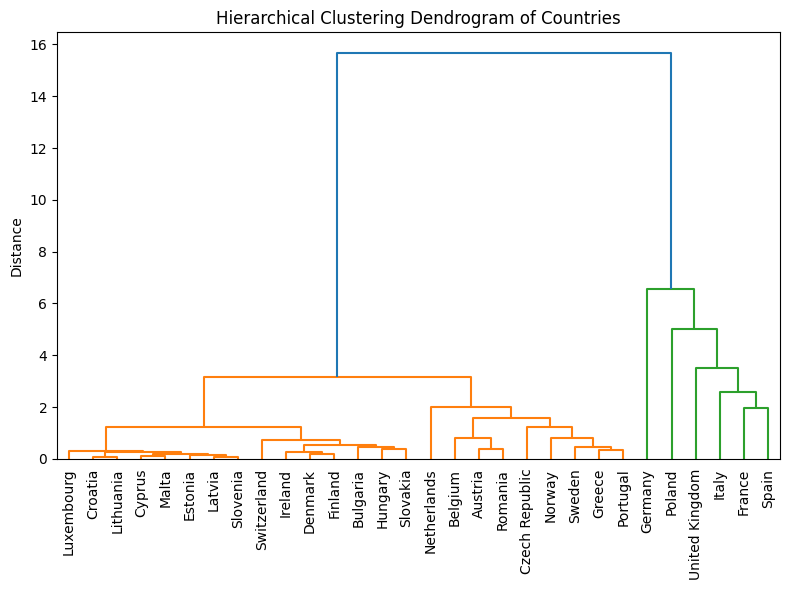

In [130]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Use the same df_pc (countries×sectors)
Z = linkage(StandardScaler().fit_transform(df_pc), method='ward')
plt.figure(figsize=(8, 6))
dendrogram(Z, labels=df_pc.index, leaf_rotation=90)
plt.title("Hierarchical Clustering Dendrogram of Countries")
plt.ylabel("Distance")
plt.tight_layout()
plt.show()


In [131]:
import pandas as pd
import plotly.graph_objects as go

# Aggregate emissions for EU27 & UK
global_yearly = (
    EU_data[EU_data['country'] == 'EU27 & UK']
    .groupby('year')['MtCO2 per day']
    .sum()
    .reset_index()
)

# Compute year-over-year differences
global_yearly['diff'] = global_yearly['MtCO2 per day'].diff()
global_yearly.loc[0, 'diff'] = global_yearly.loc[0, 'MtCO2 per day']

# Prepare waterfall chart data
years    = global_yearly['year'].astype(str).tolist()
measures = ["absolute"] + ["relative"] * (len(years) - 1)
values   = [global_yearly['MtCO2 per day'].iloc[0]] + global_yearly['diff'].iloc[1:].tolist()

# Create the waterfall chart
fig = go.Figure(go.Waterfall(
    name="Europe Emissions",
    orientation="v",
    measure=measures,
    x=years,
    text=[f"{d:.2f}" for d in global_yearly['diff']],
    y=values,
    connector={"line": {"color": "grey"}}
))

fig.update_layout(
    title="Year-over-Year Change in Emissions (EU27 & UK)",
    waterfallgap=0.3,
    xaxis_title="Year",
    yaxis_title="Emissions (MtCO₂ per day)"
)

fig.show()


In [132]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from statsmodels.tsa.seasonal import STL

# 1) Filter out the aggregate for plotting only
df_eu = (
    EU_data[EU_data['country'] != 'EU27 & UK']
    .groupby('date')['MtCO2 per day']
    .sum()
    .reset_index()
)

# 2) Prepare time series
df_eu['date'] = pd.to_datetime(df_eu['date'], dayfirst=True)
df_eu.set_index('date', inplace=True)
df_eu_daily = df_eu.resample('D').sum()

# 3) STL decomposition
stl_eu = STL(df_eu_daily['MtCO2 per day'], seasonal=13)
result_eu = stl_eu.fit()
trend_eu     = result_eu.trend
seasonal_eu  = result_eu.seasonal
residual_eu  = result_eu.resid

# 4) Plotly subplots
fig_eu = make_subplots(
    rows=3, cols=1, shared_xaxes=True, vertical_spacing=0.05,
    subplot_titles=["Trend", "Seasonality", "Residuals"]
)
fig_eu.add_trace(go.Scatter(x=trend_eu.index,    y=trend_eu,    name="Trend"),      row=1, col=1)
fig_eu.add_trace(go.Scatter(x=seasonal_eu.index, y=seasonal_eu, name="Seasonality"), row=2, col=1)
fig_eu.add_trace(go.Scatter(x=residual_eu.index, y=residual_eu, name="Residuals"),   row=3, col=1)

fig_eu.update_layout(
    height=800, width=1000,
    title_text="STL Decomposition of Daily Emissions (Excl. EU27 & UK)"
)
fig_eu.show()


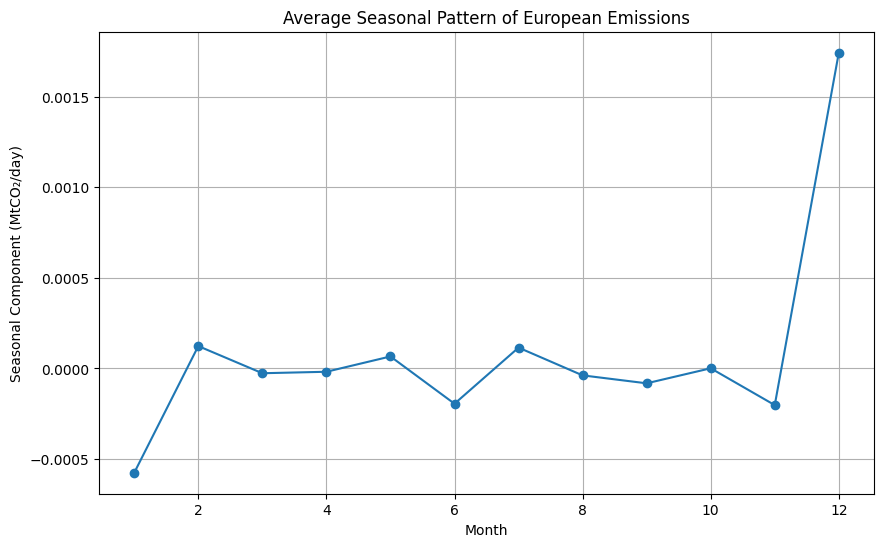

In [133]:
# 1) Build the “true” EU total series:
eu_total = (
    EU_data
    .query("country != 'EU27 & UK'")   # keep every country, but not the aggregate
    .groupby('date')['MtCO2 per day']
    .sum()
    .reset_index(name='emissions')
)

# 2) STL decomposition
from statsmodels.tsa.seasonal import STL
eu_total.set_index('date', inplace=True)
res = STL(eu_total['emissions'], seasonal=13).fit()

# 3) Compute average seasonal pattern
df_seas = res.seasonal.to_frame('seasonal')
df_seas['month'] = df_seas.index.month
avg_seas = df_seas.groupby('month')['seasonal'].mean()

# 4) Plot
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(avg_seas.index, avg_seas.values, marker='o')
plt.title('Average Seasonal Pattern of European Emissions')
plt.xlabel('Month')
plt.ylabel('Seasonal Component (MtCO₂/day)')
plt.grid(True)
plt.show()


In [134]:
# 1) Build your own EU total (excluding the aggregate row)
df_eu = (
    EU_data
    .query("country != 'EU27 & UK'")     # keep only individual countries
    .groupby('date')['MtCO2 per day']
    .sum()
    .reset_index(name='emissions')
)

# 2) Compute a 30-day rolling average
df_eu['rolling_mean_30'] = df_eu['emissions'].rolling(window=30, min_periods=1).mean()

# 3) Plot with Plotly Express (using correct column names)
fig = px.line(
    df_eu,
    x='date',
    y=['emissions', 'rolling_mean_30'],
    labels={
        'value': 'Emissions (MtCO₂ per day)',
        'variable': ''
    },
    title="European Emissions & 30-Day Rolling Average (Excl. EU27 & UK)"
)

# Rename legend entries for clarity
fig.for_each_trace(lambda trace: trace.update(name='Daily Total'
                                              if trace.name == 'emissions'
                                              else '30-Day Rolling Avg'))

fig.update_layout(xaxis_title="Date", yaxis_title="MtCO₂ per day")
fig.show()


In [135]:
# Exclude aggregate for this analysis
plot_df = EU_data.query("country != 'EU27 & UK' and country != 'WORLD' and country != 'ROW'")

# Aggregate total emissions per sector and country
sector_country = (
    plot_df
    .groupby(['sector', 'country'])['MtCO2 per day']
    .sum()
    .reset_index()
)

# Get top 10 and bottom 10 emitters for each sector
top10 = sector_country.groupby('sector').apply(lambda df: df.nlargest(10, 'MtCO2 per day')).reset_index(drop=True)
bottom10 = sector_country.groupby('sector').apply(lambda df: df.nsmallest(10, 'MtCO2 per day')).reset_index(drop=True)

# Label them and combine
top10['rank_type'] = 'Top 10'
bottom10['rank_type'] = 'Bottom 10'
combined = pd.concat([top10, bottom10])

# Plot as faceted bar chart
fig = px.bar(
    combined,
    x='country',
    y='MtCO2 per day',
    color='rank_type',
    facet_col='sector',
    facet_col_wrap=3,
    title="Top 10 vs Bottom 10 Country Emitters per Sector (Excl. Aggregates)",
    labels={'MtCO2 per day': 'Total Emissions (MtCO₂ per day)'}
)

fig.update_layout(
    legend_title_text='Emitter Group',
    height=800
)
fig.update_xaxes(tickangle=-45)
fig.show()


In [136]:
# Prepare your top/bottom DataFrame as before
plot_df = EU_data.query("country not in ['EU27 & UK','WORLD','ROW']")
sector_country = (
    plot_df
    .groupby(['sector','country'])['MtCO2 per day']
    .sum()
    .reset_index()
)
top10 = sector_country.groupby('sector').apply(lambda df: df.nlargest(5, 'MtCO2 per day')).reset_index(drop=True)
bottom10 = sector_country.groupby('sector').apply(lambda df: df.nsmallest(5, 'MtCO2 per day')).reset_index(drop=True)
top10['group'] = 'Top 10'
bottom10['group'] = 'Bottom 10'
combined = pd.concat([top10,bottom10])

# Loop through sectors, drawing one horizontal bar chart each
for sec in combined['sector'].unique():
    df_sec = combined[combined['sector']==sec].sort_values('MtCO2 per day')
    fig = px.bar(
        df_sec,
        x='MtCO2 per day',
        y='country',
        color='group',
        orientation='h',
        title=f"{sec}: Top 10 vs Bottom 10 Emitters",
        labels={'MtCO2 per day':'Total Emissions (MtCO₂/day)','country':'Country'},
        height=600
    )
    fig.update_layout(yaxis={'categoryorder':'total ascending'})  # ensures small→large vertically
    fig.show()


In [137]:
# Exclude aggregate regions
plot_df = EU_data.query("country not in ['EU27 & UK','WORLD','ROW']")

# Aggregate total emissions per sector and country
sector_country = (
    plot_df
    .groupby(['sector', 'country'])['MtCO2 per day']
    .sum()
    .reset_index()
)

# Get top 5 emitters for each sector
top5 = (
    sector_country
    .groupby('sector')
    .apply(lambda df: df.nlargest(5, 'MtCO2 per day'))
    .reset_index(drop=True)
)

# Display the table
print("Top 5 Country Emitters per Sector\n", top5)


Top 5 Country Emitters per Sector
                     sector         country  MtCO2 per day
0        Domestic Aviation          France      26.757209
1        Domestic Aviation           Spain      19.681254
2        Domestic Aviation           Italy      13.347755
3        Domestic Aviation  United Kingdom       8.842073
4        Domestic Aviation  Czech Republic       7.285456
5         Ground Transport         Germany     904.063920
6         Ground Transport          France     698.866732
7         Ground Transport  United Kingdom     693.913257
8         Ground Transport           Italy     540.589296
9         Ground Transport           Spain     514.268765
10                Industry         Germany     697.562202
11                Industry  United Kingdom     370.027390
12                Industry           Spain     360.700935
13                Industry          France     348.442478
14                Industry           Italy     312.736633
15  International Aviation  United Ki

#Change point detection

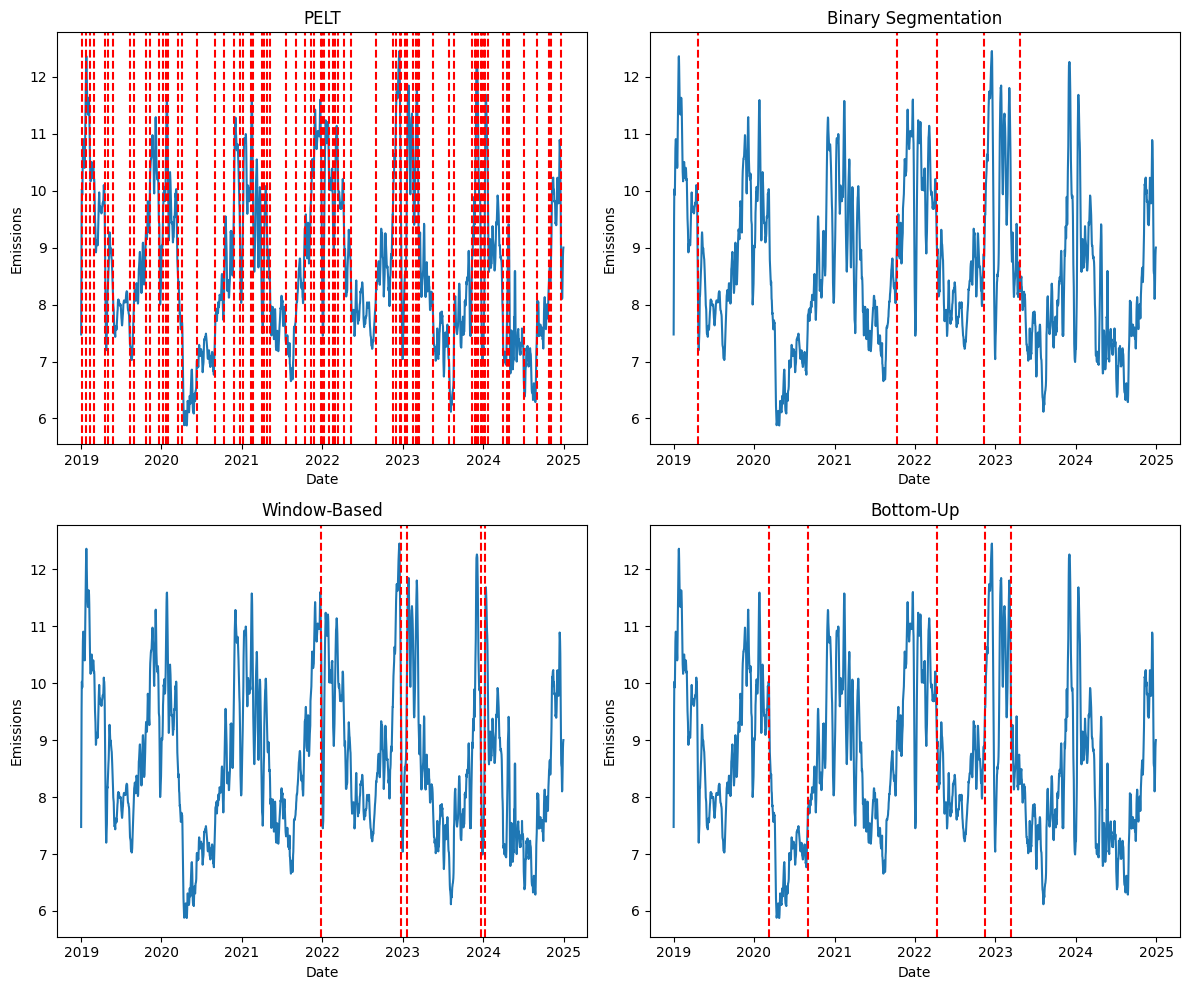

Change Point Detection Summary 
                 Method  Number of Change Points  Cost Function (Sum of Costs)
0                 PELT                       74                    288.776951
1  Binary Segmentation                        5                   2978.839638
2         Window-Based                        5                   3948.124411
3            Bottom-Up                        5                   2831.677675


In [138]:
import pandas as pd
import ruptures as rpt
import matplotlib.pyplot as plt

df_eu = (EU_data
         .query("country not in ['EU27 & UK', 'WORLD', 'ROW']")
         .groupby('date')['MtCO2 per day']
         .sum()
         .reset_index(name='emissions'))
signal = df_eu['emissions'].values

# 2) Define change point detection methods
methods = {
    'PELT': rpt.Pelt(model="l2"),
    'Binary Segmentation': rpt.Binseg(model="l2"),
    'Window-Based': rpt.Window(width=30, model="l2"),
    'Bottom-Up': rpt.BottomUp(model="l2")
}

# 3) Function to compute cost (sum of squared deviations per segment)
def compute_cost(signal, bkps):
    cost = 0.0
    start = 0
    for end in bkps:
        segment = signal[start:end]
        cost += ((segment - segment.mean())**2).sum()
        start = end
    return cost

# 4) Apply each method, predict change points, plot, and collect stats
results = []
plt.figure(figsize=(12, 10))
for i, (name, algo) in enumerate(methods.items(), 1):
    # fit and predict (choose 5 change points for those requiring n_bkps)
    if name == 'PELT':
        bkps = algo.fit(signal).predict(pen=3 * signal.std())
    else:
        bkps = algo.fit(signal).predict(n_bkps=5)

    # plot
    plt.subplot(2, 2, i)
    plt.plot(df_eu['date'], signal, label='Emissions')
    for cp in bkps[:-1]:
        plt.axvline(df_eu['date'].iloc[cp], color='red', linestyle='--')
    plt.title(name)
    plt.xlabel('Date')
    plt.ylabel('Emissions')

    # stats
    n_cpts = len(bkps) - 1
    cost = compute_cost(signal, bkps)
    results.append({'Method': name, 'Number of Change Points': n_cpts, 'Cost Function (Sum of Costs)': cost})

plt.tight_layout()
plt.show()

# 5) Display summary table
results_df = pd.DataFrame(results)
print("Change Point Detection Summary \n", results_df)


With BIC and Exact dates

In [139]:

# Step 1: Aggregate
df_eu = (EU_data
         .query("country not in ['EU27 & UK', 'WORLD', 'ROW']")
         .groupby('date')['MtCO2 per day']
         .sum()
         .reset_index(name='emissions'))
signal = df_eu['emissions'].values

# Step 2: Define methods
methods = {
    'PELT': rpt.Pelt(model="l2"),
    'Binary Segmentation': rpt.Binseg(model="l2"),
    'Window-Based': rpt.Window(width=30, model="l2"),
    'Bottom-Up': rpt.BottomUp(model="l2")
}

# Step 3: Cost Function
def compute_cost(signal, bkps):
    cost = 0.0
    start = 0
    for end in bkps:
        segment = signal[start:end]
        cost += ((segment - segment.mean())**2).sum()
        start = end
    return cost

# Step 4: BIC Function
def compute_bic(signal, bkps):
    n = len(signal)
    k = len(bkps) - 1
    rss = compute_cost(signal, bkps)
    bic = n * np.log(rss / n) + k * np.log(n)
    return bic

# Step 5: Apply methods
results = []
cpt_dates_dict = {}
fig = make_subplots(rows=2, cols=2, subplot_titles=list(methods.keys()))

row, col = 1, 1
for name, algo in methods.items():
    if name == 'PELT':
        bkps = algo.fit(signal).predict(pen=3 * signal.std())
    else:
        bkps = algo.fit(signal).predict(n_bkps=5)

    dates = df_eu['date'].iloc[bkps[:-1]].tolist()
    cpt_dates_dict[name] = dates

    cost = compute_cost(signal, bkps)
    bic = compute_bic(signal, bkps)
    results.append({'Method': name, 'Change Point Count': len(bkps)-1, 'Cost': cost, 'BIC': bic})

    fig.add_trace(go.Scatter(x=df_eu['date'], y=signal, mode='lines', name=name), row=row, col=col)
    for cp in bkps[:-1]:
        fig.add_trace(go.Scatter(x=[df_eu['date'].iloc[cp]]*2,
                                 y=[min(signal), max(signal)],
                                 mode='lines',
                                 line=dict(color='red', dash='dot'),
                                 showlegend=False), row=row, col=col)

    col += 1
    if col > 2:
        col = 1
        row += 1

fig.update_layout(height=800, width=1000, title="Change Point Detection Methods - Emissions Over Time")
fig.show()

# Step 6: Summary Table
summary_df = pd.DataFrame(results)
print("\nChange Point Detection Summary:\n", summary_df)
print("\nDetected Change Point Dates:\n")
for method, dates in cpt_dates_dict.items():
    print(f"{method}: {dates}")



Change Point Detection Summary:
                 Method  Change Point Count         Cost          BIC
0                 PELT                  74   288.776951 -3873.747641
1  Binary Segmentation                   5  2978.839638   710.791932
2         Window-Based                   5  3948.124411  1328.293220
3            Bottom-Up                   5  2831.677675   599.735375

Detected Change Point Dates:

PELT: [Timestamp('2019-01-06 00:00:00'), Timestamp('2019-01-21 00:00:00'), Timestamp('2019-02-10 00:00:00'), Timestamp('2019-03-02 00:00:00'), Timestamp('2019-04-21 00:00:00'), Timestamp('2019-05-01 00:00:00'), Timestamp('2019-05-26 00:00:00'), Timestamp('2019-08-09 00:00:00'), Timestamp('2019-08-29 00:00:00'), Timestamp('2019-10-23 00:00:00'), Timestamp('2019-11-12 00:00:00'), Timestamp('2019-12-22 00:00:00'), Timestamp('2020-01-06 00:00:00'), Timestamp('2020-01-21 00:00:00'), Timestamp('2020-01-31 00:00:00'), Timestamp('2020-03-16 00:00:00'), Timestamp('2020-04-05 00:00:00'), Times

#Hypothesis Testing

In [140]:
from scipy import stats

Do different sectors in Europe have significantly different average daily CO₂ emissions?

In [141]:
# Exclude aggregates and prepare daily sector emissions
sector_trend = (
    EU_data
    .query("country not in ['EU27 & UK','WORLD','ROW']")
    .groupby(['date', 'sector'])['MtCO2 per day']
    .sum()
    .reset_index()
)

# Define sectors of interest
sectors = ['Power', 'Industry', 'Ground Transport', 'Residential',
           'Domestic Aviation', 'International Aviation']

# Extract emissions series for each sector
sector_emissions = [
    sector_trend.loc[sector_trend['sector'] == s, 'MtCO2 per day'].values
    for s in sectors
]

# Perform one-way ANOVA
anova_result = stats.f_oneway(*sector_emissions)

# Display results
print("One-way ANOVA across sectors for daily emissions:")
print(f"  F-statistic = {anova_result.statistic:.3f}")
print(f"  P-value     = {anova_result.pvalue:.3e}")


One-way ANOVA across sectors for daily emissions:
  F-statistic = 11757.428
  P-value     = 0.000e+00


Do daily CO₂ emissions differ significantly across sectors without assuming normality?

In [142]:
from scipy.stats import kruskal

# Kruskal-Wallis Test across all sectors
kruskal_result = kruskal(*sector_emissions)
print(f"Kruskal-Wallis H-statistic = {kruskal_result.statistic:.2f}")
print(f"P-value = {kruskal_result.pvalue:.4f}")

Kruskal-Wallis H-statistic = 10323.14
P-value = 0.0000


Did CO₂ emissions in Europe significantly change after the onset of COVID-19 compared to before?

In [143]:
# 1) Build EU total series by summing individual countries (excluding aggregates)
eu_total = (
    EU_data
    .query("country not in ['EU27 & UK','WORLD','ROW']")
    .groupby('date')['MtCO2 per day']
    .sum()
    .reset_index(name='emissions')
)
eu_total['date'] = pd.to_datetime(eu_total['date'], dayfirst=True)

# --- Hypothesis Test 1: Two-sample t-test (Pre- vs Post-COVID) ---
pre_covid  = eu_total.loc[eu_total['date'] <= '2020-03-31', 'emissions']
post_covid = eu_total.loc[(eu_total['date'] >= '2020-04-01') & (eu_total['date'] <= '2021-03-31'), 'emissions']
t_stat, p_val = stats.ttest_ind(pre_covid, post_covid, equal_var=False, nan_policy='omit')
print("Two-sample t-test comparing Pre-COVID (≤2020-03-31) vs Post-COVID (2020-04-01 to 2021-03-31):")
print(f"  T-statistic = {t_stat:.3f}")
print(f"  P-value     = {p_val:.3f}\n")

Two-sample t-test comparing Pre-COVID (≤2020-03-31) vs Post-COVID (2020-04-01 to 2021-03-31):
  T-statistic = 9.274
  P-value     = 0.000



Are there significant differences in CO₂ emissions between weekdays and weekends in Europe?

In [144]:
# --- Hypothesis Test 2: Mann-Whitney U Test (Weekday vs Weekend) ---
eu_total['day_of_week'] = eu_total['date'].dt.dayofweek
eu_total['weekend']     = eu_total['day_of_week'] >= 5
weekday = eu_total.loc[eu_total['weekend']==False, 'emissions']
weekend = eu_total.loc[eu_total['weekend']==True,  'emissions']
u_stat, p_val_u = stats.mannwhitneyu(weekday, weekend, alternative='two-sided')
print("Mann-Whitney U Test comparing Weekday vs Weekend emissions:")
print(f"  U-statistic = {u_stat:.3f}")
print(f"  P-value     = {p_val_u:.3f}\n")

Mann-Whitney U Test comparing Weekday vs Weekend emissions:
  U-statistic = 489720.000
  P-value     = 0.974



Compare same months across multiple years (e.g., March 2019 vs. March 2020) to assess seasonal + COVID impact.

In [145]:
#  Compare March emissions across two years
march_2019 = eu_total[(eu_total['date'].dt.year == 2019) & (eu_total['date'].dt.month == 3)]['emissions']
march_2020 = eu_total[(eu_total['date'].dt.year == 2020) & (eu_total['date'].dt.month == 3)]['emissions']

# Paired t-test
from scipy.stats import ttest_rel
paired_result = ttest_rel(march_2019.values, march_2020.values)
print(f"Paired T-statistic = {paired_result.statistic:.3f}, P-value = {paired_result.pvalue:.3f}")


Paired T-statistic = 3.922, P-value = 0.000


In [146]:
# --- Bivariate Relationship: Correlation Matrix of Sectors ---
sector_ts = (
    EU_data
    .query("country not in ['WORLD','EU27 & UK','ROW']")
    .pivot_table(index='date', columns='sector', values='MtCO2 per day', aggfunc='sum')
    .fillna(0)
)
corr_matrix = sector_ts.corr()
print("Correlation matrix between sectors:")
print(corr_matrix, "\n")

# Plot interactive heatmap
fig = px.imshow(
    corr_matrix,
    title="Correlation Matrix of Sector Emissions",
    labels={'x':'Sector','y':'Sector','color':'Correlation'}
)
fig.update_traces(texttemplate='%{z:.2f}', textfont_size=9)
fig.show()


Correlation matrix between sectors:
sector                  Domestic Aviation  Ground Transport  Industry  \
sector                                                                  
Domestic Aviation                1.000000          0.490020  0.165349   
Ground Transport                 0.490020          1.000000  0.498610   
Industry                         0.165349          0.498610  1.000000   
International Aviation           0.917906          0.359524  0.092136   
Power                           -0.071462          0.184494  0.489694   
Residential                     -0.261905          0.047205  0.117628   

sector                  International Aviation     Power  Residential  
sector                                                                 
Domestic Aviation                     0.917906 -0.071462    -0.261905  
Ground Transport                      0.359524  0.184494     0.047205  
Industry                              0.092136  0.489694     0.117628  
International Aviat

#Anomaly Detection

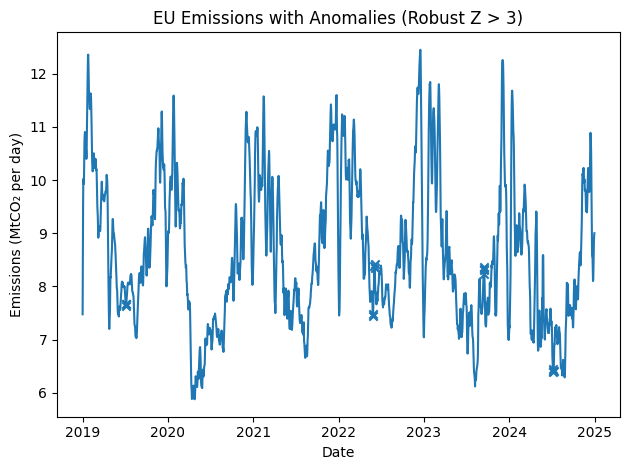

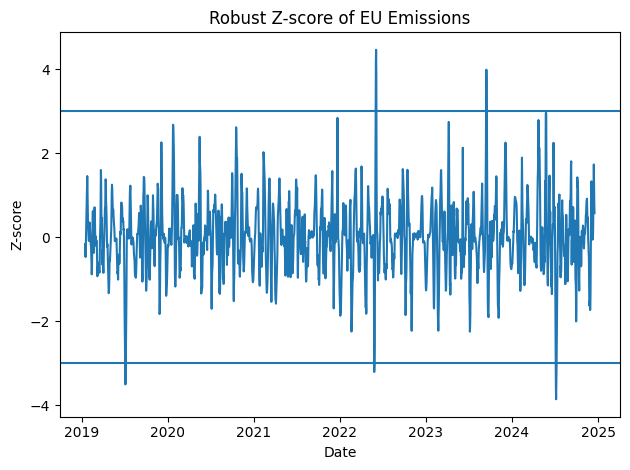

In [147]:
# 1) Build EU total series (excluding aggregates)
df_eu = (
    EU_data
    .query("country not in ['EU27 & UK','WORLD','ROW']")
    .groupby('date')['MtCO2 per day']
    .sum()
    .reset_index(name='emissions')
)

# 2) Compute rolling median and MAD for robust z-score
window = 30
df_eu['rolling_median'] = df_eu['emissions'].rolling(window, center=True).median()
df_eu['mad'] = df_eu['emissions'].rolling(window, center=True).apply(
    lambda x: np.median(np.abs(x - np.median(x))), raw=True
)
df_eu['robust_z'] = (df_eu['emissions'] - df_eu['rolling_median']) / (1.4826 * df_eu['mad'])

# 3) Flag anomalies where |z| > 3
anomalies = df_eu[np.abs(df_eu['robust_z']) > 3]

# 4) Plot total emissions and anomalies using matplotlib
plt.figure()
plt.plot(df_eu['date'], df_eu['emissions'])
plt.scatter(anomalies['date'], anomalies['emissions'], marker='x')
plt.title('EU Emissions with Anomalies (Robust Z > 3)')
plt.xlabel('Date')
plt.ylabel('Emissions (MtCO₂ per day)')
plt.tight_layout()
plt.show()

# 5) Plot robust z-score
plt.figure()
plt.plot(df_eu['date'], df_eu['robust_z'])
plt.axhline(3)
plt.axhline(-3)
plt.title('Robust Z-score of EU Emissions')
plt.xlabel('Date')
plt.ylabel('Z-score')
plt.tight_layout()
plt.show()


In [148]:
import numpy as np
import plotly.graph_objects as go

# 1) Build your “EU total” series (sum of all individual countries, excluding aggregates)
df_eu = (
    EU_data
    .query("country not in ['EU27 & UK','WORLD','ROW']")
    .groupby('date')['MtCO2 per day']
    .sum()
    .reset_index(name='emissions')
)

# 2) Compute rolling median & MAD → robust Z-score
window = 30
df_eu['rolling_med'] = df_eu['emissions'].rolling(window, center=True).median()
df_eu['mad']         = df_eu['emissions'].rolling(window, center=True) \
                            .apply(lambda x: np.median(np.abs(x - np.median(x))), raw=True)
df_eu['robust_z']    = (df_eu['emissions'] - df_eu['rolling_med']) / (1.4826 * df_eu['mad'])

# 3) Flag anomalies where |Z| > 3
anomalies = df_eu[np.abs(df_eu['robust_z']) > 3]

# 4) Plotly interactive chart
fig = go.Figure([
    go.Scatter(
        x=df_eu['date'], y=df_eu['emissions'],
        mode='lines', name='Emissions',
        line=dict(color='steelblue')
    ),
    go.Scatter(
        x=anomalies['date'], y=anomalies['emissions'],
        mode='markers+text', name='Anomaly',
        marker=dict(color='crimson', size=10),
        text=anomalies['date'].dt.strftime('%Y-%m-%d'),
        textposition='top center'
    )
])

fig.update_layout(
    title="EU Total Emissions with Anomalies (Robust Z > 3)",
    xaxis_title="Date",
    yaxis_title="Emissions (MtCO₂ per day)",
    legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1)
)
fig.show()

# 5) Print anomaly table
anomaly_tbl = anomalies[['date','emissions','robust_z']].copy()
anomaly_tbl.columns = ['Date','Emissions (MtCO₂/day)','Robust Z']
print("\nDetected Anomalies:\n")
print(anomaly_tbl.to_string(index=False))



Detected Anomalies:

      Date  Emissions (MtCO₂/day)  Robust Z
2019-07-05               7.662919 -3.226966
2019-07-06               7.634401 -3.504257
2019-07-07               7.673645 -3.429259
2022-05-27               7.448311 -3.208562
2022-05-28               7.485355 -3.052017
2022-06-03               8.386622  4.167788
2022-06-04               8.423407  4.468640
2022-06-05               8.340187  3.813611
2023-09-14               8.336027  3.430351
2023-09-15               8.367510  3.994970
2023-09-16               8.315154  3.715582
2023-09-17               8.224580  3.004897
2024-07-06               6.444096 -3.556074
2024-07-07               6.380062 -3.857716
2024-07-08               6.407813 -3.429632
2024-07-09               6.412244 -3.013860


In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor


# --- 1) Build your “EU total” series (sum of all individual countries, no aggregates) ---
df_eu = (
    EU_data
    .query("country not in ['EU27 & UK','WORLD','ROW']")
    .groupby('date')['MtCO2 per day']
    .sum()
    .reset_index(name='emissions')
)

# --- 2) Robust-Z Anomaly (causal window of past 30 days) ---
df_eu['rolling_med'] = df_eu['emissions'].rolling(window=30, min_periods=1).median()
df_eu['mad'] = df_eu['emissions'].rolling(window=30, min_periods=1) \
                  .apply(lambda x: np.median(np.abs(x - np.median(x))), raw=True)
df_eu['z_score'] = (df_eu['emissions'] - df_eu['rolling_med']) / (1.4826 * df_eu['mad'])
df_eu['anomaly_robust_z'] = df_eu['z_score'].abs() > 3

# --- 3) STL Residual Anomaly ---
stl = STL(df_eu.set_index('date')['emissions'].resample('D').sum(), seasonal=13)
res = stl.fit()
df_eu['residual'] = res.resid.values
df_eu['resid_z'] = (df_eu['residual'] - df_eu['residual'].mean()) / df_eu['residual'].std()
df_eu['anomaly_stl'] = df_eu['resid_z'].abs() > 3

# --- 4) Isolation Forest Anomaly ---
iso = IsolationForest(contamination=0.01, random_state=42)
df_eu['anomaly_iso'] = iso.fit_predict(df_eu[['emissions']]) == -1

# --- 5) Local Outlier Factor Anomaly ---
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.01)
df_eu['anomaly_lof'] = lof.fit_predict(df_eu[['emissions']]) == -1

# --- 6) Summary of counts ---
methods = {
    'Robust Z':    'anomaly_robust_z',
    'STL Residual':'anomaly_stl',
    'IsolationForest':'anomaly_iso',
    'LocalOutlierFactor':'anomaly_lof'
}
summary = pd.DataFrame([
    {'Method': m, 'Num Anomalies': df_eu[col].sum()}
    for m,col in methods.items()
])
print(summary.to_string(index=False))

# --- 7) List anomaly dates & values per method ---
for m, col in methods.items():
    subset = df_eu[df_eu[col]][['date','emissions', 'z_score' if col=='anomaly_robust_z' else 'resid_z' if col=='anomaly_stl' else 'emissions']]
    subset = subset.rename(columns={
        'date':'Date',
        'emissions':'Emissions',
        'z_score':'Z-Score',
        'resid_z':'Residual Z'
    })
    print(f"\n=== {m} Anomalies ===")
    print(subset.to_string(index=False))



            Method  Num Anomalies
          Robust Z            168
      STL Residual             23
   IsolationForest             22
LocalOutlierFactor             22

=== Robust Z Anomalies ===
      Date  Emissions    Z-Score
2019-03-04   9.627665  -3.344870
2019-03-05   9.509683  -3.920518
2019-03-06   9.409101  -4.627005
2019-03-07   9.309456  -5.614038
2019-03-08   9.104321  -6.665489
2019-03-09   8.916843  -7.454319
2019-03-10   8.941326  -6.367208
2019-03-11   9.062506  -4.961324
2019-03-12   9.086617  -4.299597
2019-03-13   9.071868  -3.888476
2019-03-14   9.129695  -3.268967
2019-04-19   9.196272  -3.714330
2019-04-20   8.800587  -6.461766
2019-04-21   8.440485  -8.578897
2019-04-22   7.969797 -12.517074
2019-04-23   7.619714 -15.965501
2019-04-24   7.336734 -18.124511
2019-04-25   7.199209 -16.430879
2019-04-26   7.300369 -13.918312
2019-04-27   7.362543 -10.002063
2019-04-28   7.525502  -6.203707
2019-04-29   7.933231  -3.753781
2019-08-09   7.560473  -3.186622
2019-08-10

In [150]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from statsmodels.tsa.seasonal import STL
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor


# 1) Build EU total series (exclude aggregates)
df_eu = (
    EU_data
    .query("country not in ['EU27 & UK','WORLD','ROW']")
    .groupby('date')['MtCO2 per day']
    .sum()
    .reset_index(name='emissions')
)

# 2) Robust-Z anomaly (causal window of past 30 days)
df_eu['rolling_med'] = df_eu['emissions'].rolling(window=30, min_periods=1).median()
df_eu['mad'] = df_eu['emissions'].rolling(window=30, min_periods=1) \
    .apply(lambda x: np.median(np.abs(x - np.median(x))), raw=True)
df_eu['z_score'] = (df_eu['emissions'] - df_eu['rolling_med']) / (1.4826 * df_eu['mad'])
df_eu['anomaly_robust'] = df_eu['z_score'].abs() > 3

# 3) STL residual anomaly
stl = STL(df_eu.set_index('date')['emissions'].resample('D').sum(), seasonal=13)
res = stl.fit()
df_eu['residual'] = res.resid.values
df_eu['z_resid'] = (df_eu['residual'] - df_eu['residual'].mean()) / df_eu['residual'].std()
df_eu['anomaly_stl'] = df_eu['z_resid'].abs() > 3

# 4) Isolation Forest anomaly
iso = IsolationForest(contamination=0.01, random_state=0)
df_eu['anomaly_iso'] = iso.fit_predict(df_eu[['emissions']]) == -1

# 5) Local Outlier Factor anomaly
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.01)
df_eu['anomaly_lof'] = lof.fit_predict(df_eu[['emissions']]) == -1

# Helper to plot
def plot_anomalies(col, title, color):
    fig = go.Figure([
        go.Scatter(
            x=df_eu['date'], y=df_eu['emissions'],
            mode='lines', name='Emissions',
            line=dict(color='steelblue')
        ),
        go.Scatter(
            x=df_eu.loc[df_eu[col], 'date'],
            y=df_eu.loc[df_eu[col], 'emissions'],
            mode='markers',
            name='Anomaly',
            marker=dict(color=color, size=8)
        )
    ])
    fig.update_layout(
        title=title,
        xaxis_title='Date',
        yaxis_title='Emissions (MtCO₂/day)'
    )
    fig.show()

# 6) Plot each method
plot_anomalies('anomaly_robust', 'Anomalies by Robust Z', 'crimson')
plot_anomalies('anomaly_stl',    'Anomalies by STL Residual', 'orange')
plot_anomalies('anomaly_iso',    'Anomalies by Isolation Forest', 'purple')
plot_anomalies('anomaly_lof',    'Anomalies by Local Outlier Factor', 'green')
